In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. This script has already been set up to load this data for you.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
data=pd.read_csv("ex1data1.txt",names=['Population','Profit']);

In [3]:
data

Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data

Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]

In [415]:
X=data.loc[:,'Population'].values
X
y=data['Profit'].values
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [33]:
print(type(y))

print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


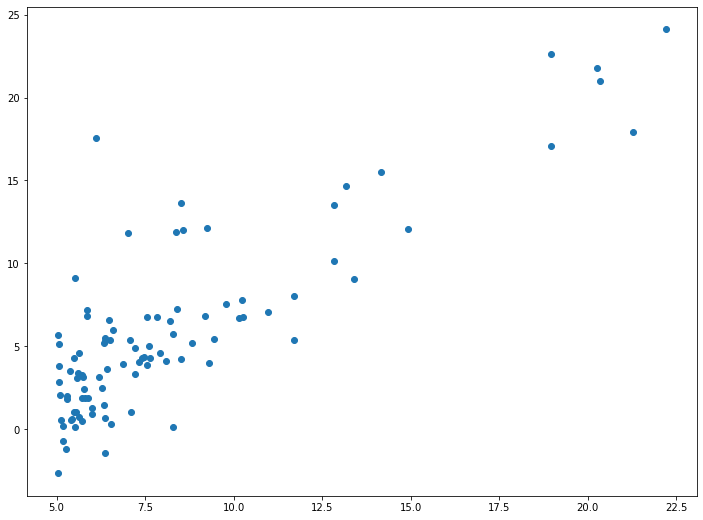

In [416]:
plt.figure()
plt.scatter(X,y)

In [417]:

X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [10]:
# d=pd.DataFrame(columns=['A'])
# for index in range(len(X)):
#     d=d.append({'A':1},ignore_index=True)
    
# d

A
0   1
1   1
2   1
3   1
4   1
.. ..
92  1
93  1
94  1
95  1
96  1

[97 rows x 1 columns]

In [11]:
# y_new=y.to_frame()
# y_new

Profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]

In [12]:
# # df=pd.concat([X,d],join='')
# # df
# df_new=X.to_frame()
# df_new
# df_new.insert(0,'new',d)
# df_new

new  Population
0    1      6.1101
1    1      5.5277
2    1      8.5186
3    1      7.0032
4    1      5.8598
..  ..         ...
92   1      5.8707
93   1      5.3054
94   1      8.2934
95   1     13.3940
96   1      5.4369

[97 rows x 2 columns]

In [13]:
# theta1=5
# a=(df_new.loc[1,'Population'])
# a
# y_new.loc[1,'Profit']

9.1302

In [14]:
# #dot product on a dataframe
# # theta=[]
# theta=np.zeros((2,),dtype=int)
# dot_product=np.dot(theta[0],df_new)
# dot_product


array([[0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0],
       [0, 0.0

In [15]:
# dot_product.shape

(97, 2)

In [16]:
# pd.DataFrame(np.subtract(dot_product,np.ones((len(dot_product),2)))).shape

(97, 2)

In [219]:
# X[1]

KeyError: 1

In [393]:
#J=(1/2m)*sum(((theta[0]+dot(theta[1],df_new)-y)**2)
def cost(X,y,theta0,theta1):
    m=len(X)
#     J=(1/(2*m))*sum(((theta[0]+np.dot(theta[1],X))-y)**2))    
    t1=np.dot(theta1,X)
#     print("temp1"+str(t1))
    t2=np.add(theta0,t1[0])
#     t2=t1.add(theta[0])
#     t2=theta[0]+t1
#     print("temp2"+str(t2))
    t3=np.subtract(t2,y)
#     print("temp3"+str(t3))
    t4=np.square(t3)
#     print("temp4"+str(t4))
    t5=t4.sum()
#     print("temp5"+str(t5))
    J=(1/(2*m)*t5)
#     print(J)
    return J

In [407]:
# X=data.loc[:,'Population'].to_frame()
# y=y_new
# theta=np.zeros((2,),dtype=int)
# cost(X,y,theta)

TypeError: cost() missing 1 required positional argument: 'theta1'

In [418]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [419]:
cost(X,y,-1,2)# when theta s are non zero

29.50291479209485

Appending to numpy empty array with the latest values  http://akuederle.com/create-numpy-array-with-for-loop

In [443]:
#theta0=theta0-(alpha/m)*sum((theta0+dot(theta1,X))-y)
#theta1=theta1-(alpha/m)*sum(((theta0+dot(theta1,X))-y)*X)
#
alpha=0.01

def gradientDescent(X,y,theta0,theta1,a,iterations):
    m=len(X)
    
    for i in range(iterations):
        hx=theta0+(theta1*X)
        theta0=theta0-a*(1/m)*np.sum(hx-y)
        theta1=theta1-a*(1/m)*np.sum((hx-y)*X)
    print(theta0)
    return theta0,theta1, hx
        

In [ ]:
theta0, theta1, hx = gradientDescent(X,y,0,0,0.01,100000)


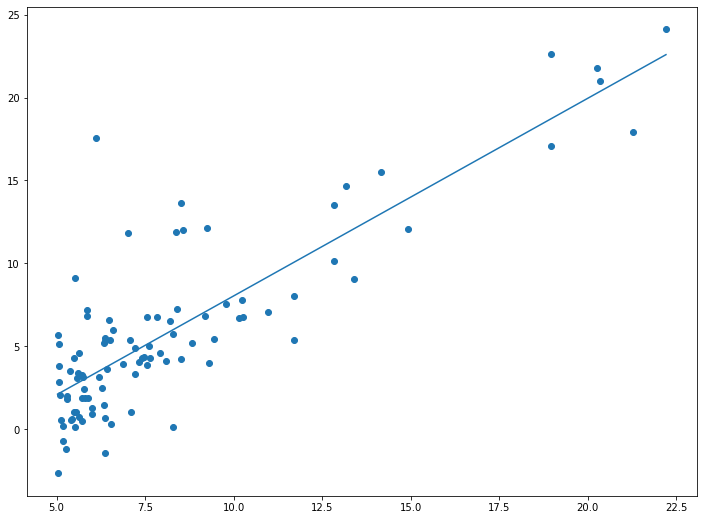

In [454]:
y_pred = hx

import matplotlib.pyplot as plt

plt.scatter(X,y)


plt.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)])
plt.show()

In [386]:
Jvalue.shape

(1500,)

In [344]:
theta[0].dtype

dtype('float64')

In [391]:
theta[0].shape

(1,)

In [369]:
nset=np.dot(theta[1],X)

In [392]:
np.add(1,nset)

array([[ 41.00810115],
       [ 37.19462541],
       [ 56.77863054],
       [ 46.85599809],
       [ 39.3691709 ],
       [ 55.89008545],
       [ 49.95444713],
       [ 57.16822842],
       [ 43.47075263],
       [ 34.09683116],
       [ 38.39288444],
       [ 93.74393949],
       [ 38.54544966],
       [ 56.05705597],
       [ 37.93453399],
       [ 36.22357724],
       [ 42.67977071],
       [ 34.59119486],
       [ 43.10014356],
       [ 47.29863367],
       [ 41.52538237],
       [133.72519439],
       [ 36.94842574],
       [ 42.42243968],
       [ 37.43820593],
       [125.04927517],
       [ 84.99599377],
       [ 72.74494104],
       [ 87.27465029],
       [146.38221466],
       [ 35.39199857],
       [ 44.14649215],
       [ 61.55595179],
       [ 39.57870253],
       [ 54.76516249],
       [ 52.94682078],
       [ 54.01084861],
       [ 37.70928749],
       [ 85.04837668],
       [ 42.60119635],
       [ 36.40364349],
       [ 46.06567096],
       [ 77.66238658],
       [ 38

In [379]:
theta.shape

AttributeError: 'list' object has no attribute 'shape'